In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong")

In [0]:
!pip install scanpy
!pip install leidenalg

In [0]:
!pip install bbknn==1.3.6
#!pip install umap==0.3.9

In [4]:
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
sc.settings.verbosity = 3 
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, figsize=(4, 4))

scanpy==1.4.6 anndata==0.7.1 umap==0.4.2 numpy==1.18.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.2


In [8]:
%ls Florian_data/cortical_dopaminergic_sample_1/

cache/    cellSNP_out/  filtered_cellranger_matrix/           scanpy_out/
cellSNP/  figures/      scanpy_florian_cortical_doma_1.ipynb  vireo_out/


In [10]:
!find Florian_data -type f -name "*whole*"

Florian_data/cortical_dopaminergic_sample_1/scanpy_out/cortical_dopaminergic_sample_1_wholeset_unnormalized.h5ad
Florian_data/cortical_dopaminergic_sample_1/scanpy_out/cortical_dopaminergic_sample_1_wholeset.h5ad
Florian_data/cortical_dopaminergic_sample_2/scanpy_out/cortical_dopaminergic_sample_2_wholeset_unnormalized.h5ad
Florian_data/cortical_dopaminergic_sample_2/scanpy_out/cortical_dopaminergic_sample_2_wholeset.h5ad
Florian_data/cortical_dopaminergic_sample_3/scanpy_out/cortical_dopaminergic_sample_3_wholeset_unnormalized.h5ad
Florian_data/cortical_dopaminergic_sample_3/scanpy_out/cortical_dopaminergic_sample_3_wholeset.h5ad
Florian_data/cortical_dopaminergic_sample_4/scanpy_out/cortical_dopaminergic_sample_4_wholeset_unnormalized.h5ad
Florian_data/cortical_dopaminergic_sample_4/scanpy_out/cortical_dopaminergic_sample_4_wholeset.h5ad
Florian_data/hypothalamic_sample_1/scanpy_out/hypothalamic_sample_1_wholeset_unnormalized.h5ad
Florian_data/hypothalamic_sample_1/scanpy_out/hypotha

## Concatenate three datasets: iPSC, combined2_NGN2, and combined2_NIL

In [0]:
filename = ["Florian_data/cortical_dopaminergic_sample_1/scanpy_out/cortical_dopaminergic_sample_1_wholeset_unnormalized.h5ad",
            "Florian_data/cortical_dopaminergic_sample_3/scanpy_out/cortical_dopaminergic_sample_3_wholeset_unnormalized.h5ad",
            "Florian_data/hypothalamic_sample_1/scanpy_out/hypothalamic_sample_1_wholeset_unnormalized.h5ad"]

In [0]:
adata_list = []
for file in filename:
  adata=sc.read_h5ad(file)
  adata_list.append(adata)


In [0]:
adata1, adata2, adata3 = adata_list

In [0]:
adata = adata1.concatenate([adata2, adata3], join="inner", batch_categories=["cortical", "dopaminergic", "hypothalamic"])

In [15]:
adata

AnnData object with n_obs × n_vars = 29659 × 19960 
    obs: 'batch', 'n_counts', 'n_genes', 'percent_mito'
    var: 'gene_ids', 'feature_types', 'n_cells-cortical', 'n_counts-cortical', 'n_cells-dopaminergic', 'n_counts-dopaminergic', 'n_cells-hypothalamic', 'n_counts-hypothalamic'

In [16]:
adata.obs.batch.value_counts()

cortical        10553
dopaminergic     9775
hypothalamic     9331
Name: batch, dtype: int64

In [17]:
adata.X

<29659x19960 sparse matrix of type '<class 'numpy.float32'>'
	with 103394595 stored elements in Compressed Sparse Row format>

In [0]:
adata.raw.X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.79388547,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [0]:
# replace the normalized X matix with their raw counts
adata.X = adata.raw.X.toarray()

In [0]:
adata.X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.79388547,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [18]:
# redo normalization and logtransformation
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [19]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


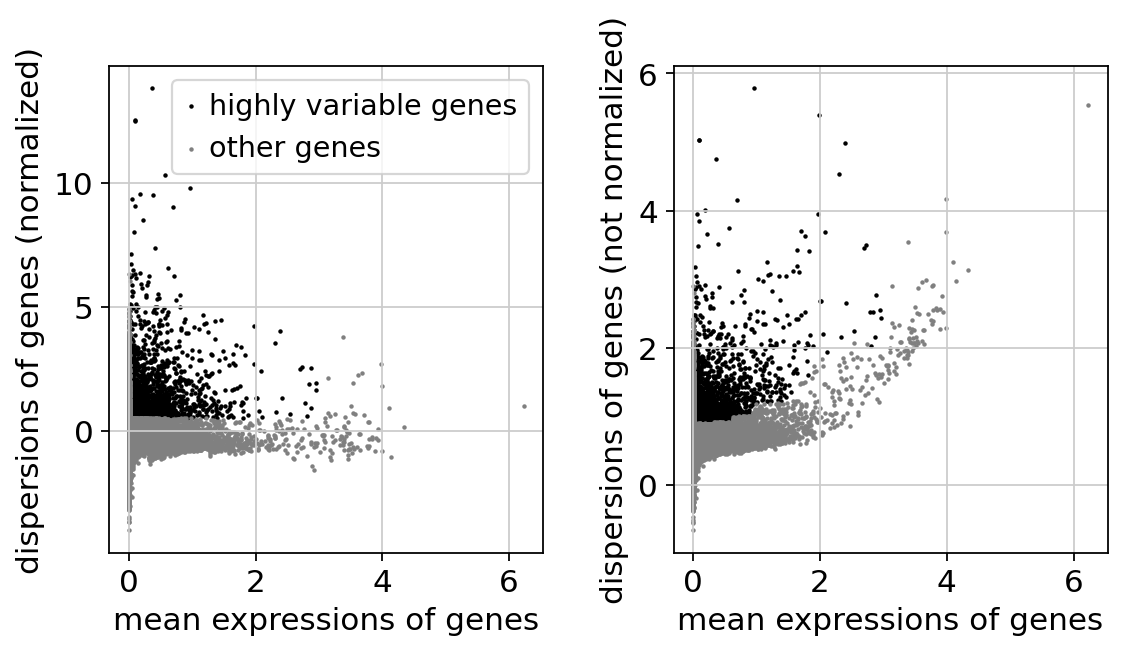

In [20]:
sc.pl.highly_variable_genes(adata)

In [0]:
adata = adata[:, adata.var.highly_variable]

In [22]:
adata

View of AnnData object with n_obs × n_vars = 29659 × 2767 
    obs: 'batch', 'n_counts', 'n_genes', 'percent_mito'
    var: 'gene_ids', 'feature_types', 'n_cells-cortical', 'n_counts-cortical', 'n_cells-dopaminergic', 'n_counts-dopaminergic', 'n_cells-hypothalamic', 'n_counts-hypothalamic', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'

In [23]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])
sc.pp.scale(adata, max_value=10)

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:01:07)


In [24]:
adata

AnnData object with n_obs × n_vars = 29659 × 2767 
    obs: 'batch', 'n_counts', 'n_genes', 'percent_mito'
    var: 'gene_ids', 'feature_types', 'n_cells-cortical', 'n_counts-cortical', 'n_cells-dopaminergic', 'n_counts-dopaminergic', 'n_cells-hypothalamic', 'n_counts-hypothalamic', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'

In [0]:
adata.write_h5ad("integrated_data/florian3sets.h5ad")

## Check the clustering of the concatenated data

In [0]:
sc.settings.set_figure_params(dpi=80, figsize=(4, 4))

    on highly variable genes
computing PCA with n_comps = 50
    finished (0:00:09)


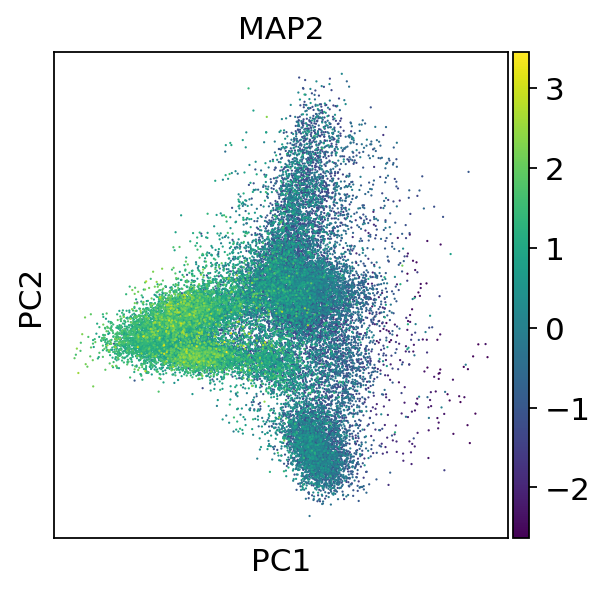

In [28]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='MAP2')

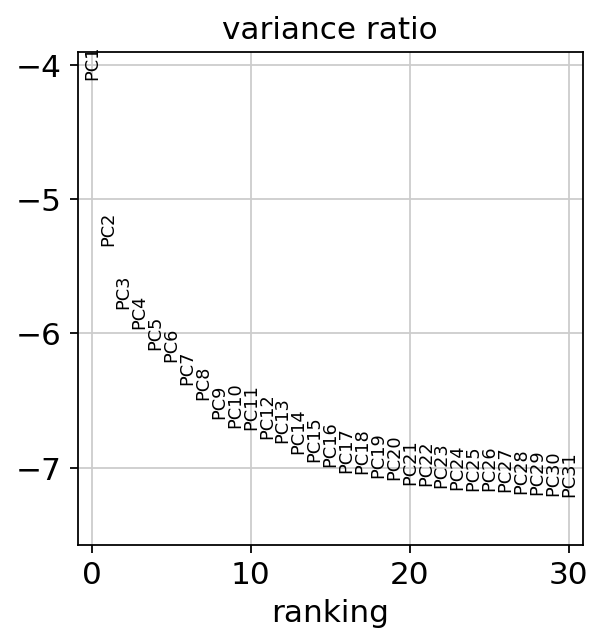

In [0]:
sc.pl.pca_variance_ratio(adata, log=True)

In [0]:
%ls

Excel_NGN2_vs_NIL/  integrated_data/  pbmc3k/          results_for_meeting/
Florian_data/       NGN2/             pool_iPSC/       test_vireo/
forebrain/          NIL/              proteomics_DIA/


In [29]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:16)


In [30]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:41)


In [31]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:13)


In [34]:
sc.tl.leiden(adata, resolution=0.6, key_added="leiden_0.6")

running Leiden clustering
    finished: found 21 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:10)


In [32]:
sc.tl.leiden(adata, resolution=0.4, key_added="leiden_0.4")

running Leiden clustering
    finished: found 17 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:16)


In [33]:
sc.tl.leiden(adata, resolution=0.2, key_added="leiden_0.2")

running Leiden clustering
    finished: found 13 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:09)


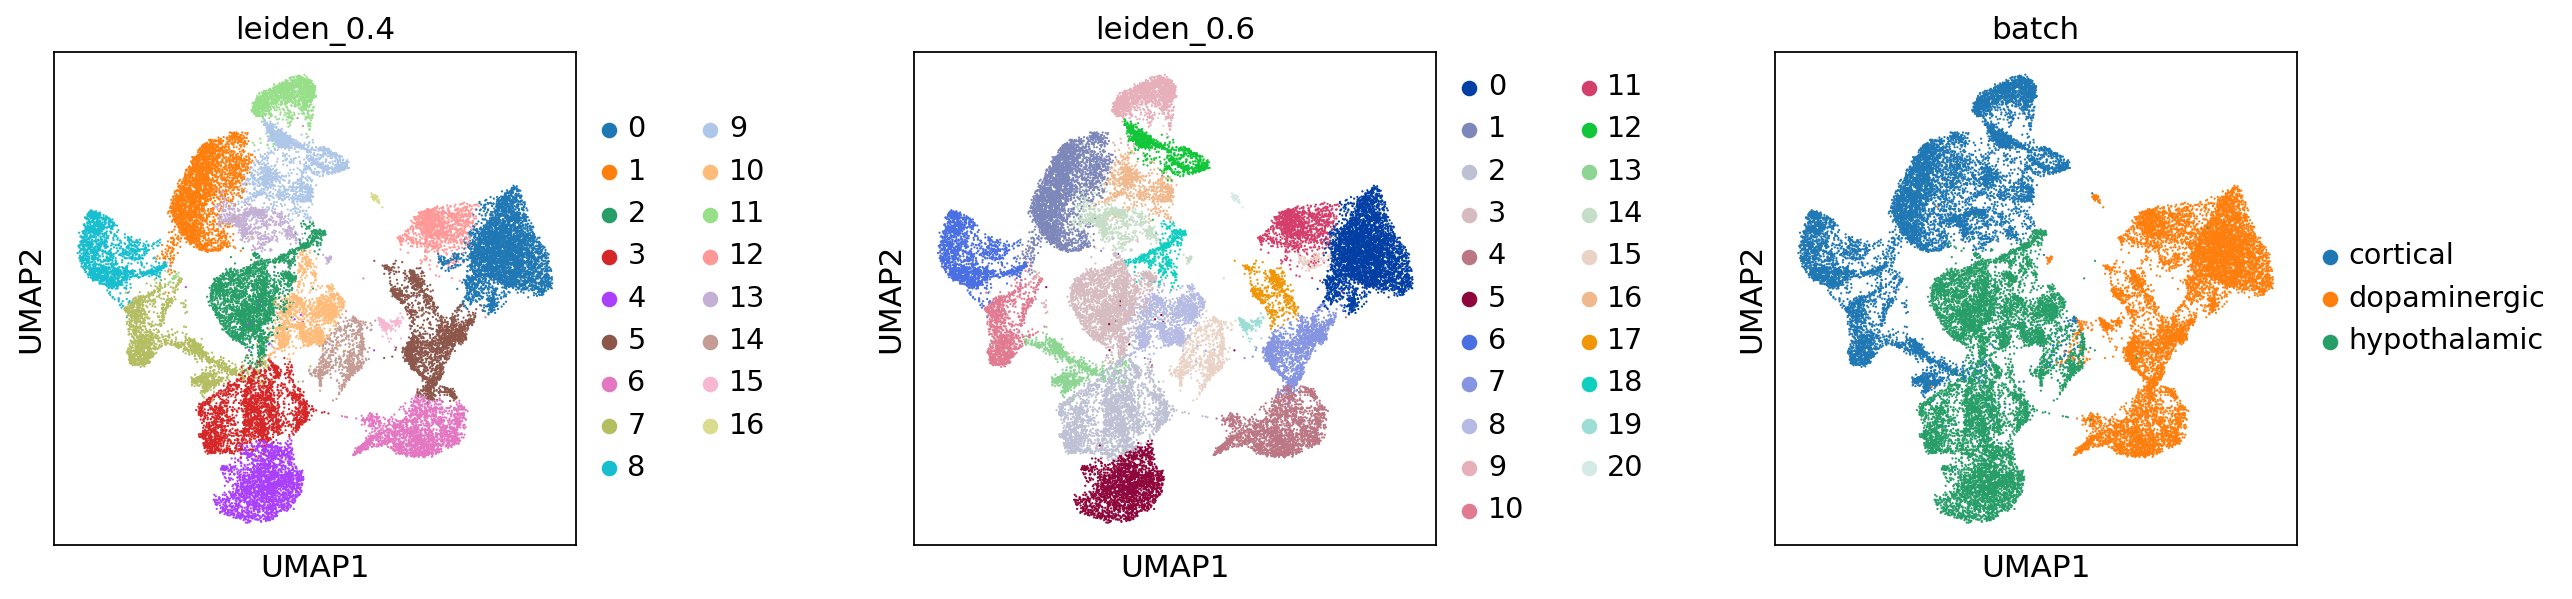

In [36]:
sc.pl.umap(adata, color=['leiden_0.4', 'leiden_0.6', 'batch'], wspace=0.5)

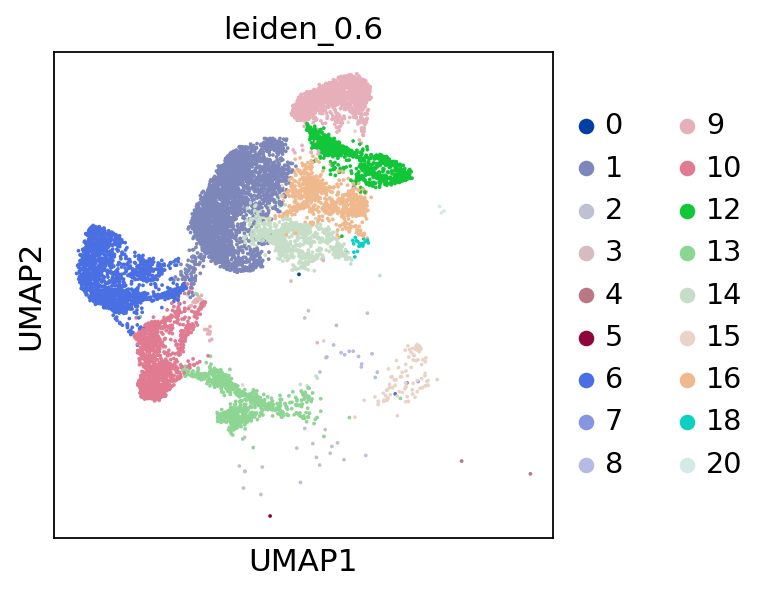

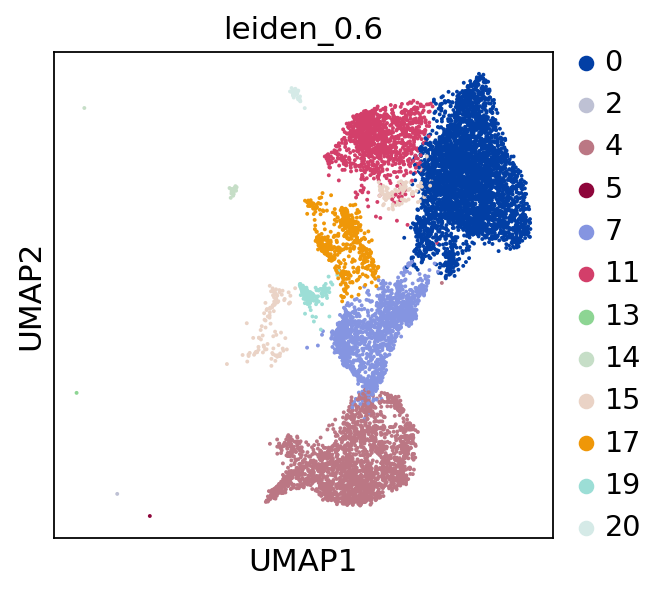

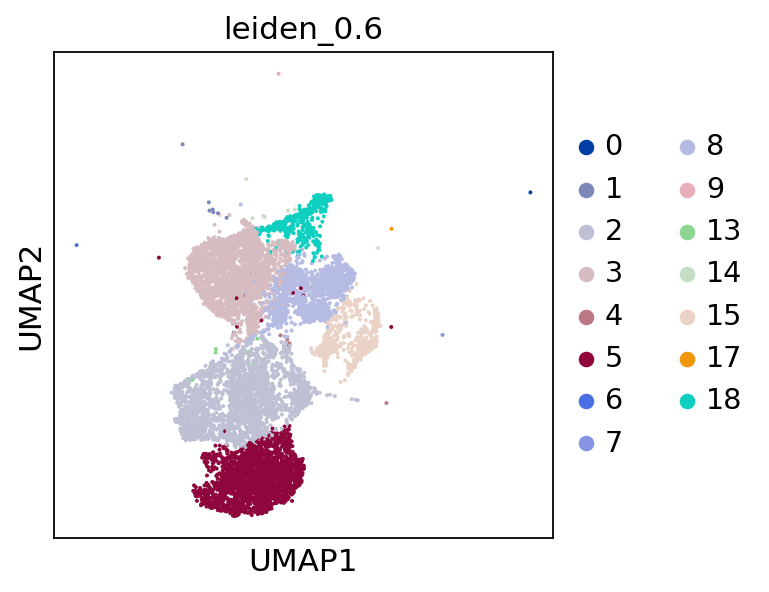

In [38]:
sc.pl.umap(adata[adata.obs.batch=="cortical"], color=['leiden_0.6'])
sc.pl.umap(adata[adata.obs.batch=="dopaminergic"], color=['leiden_0.6'])
sc.pl.umap(adata[adata.obs.batch=="hypothalamic"], color=['leiden_0.6'])

First inspection of the marker gene plots shows that cluster 11 is indeed characterized by high expression of mitochondrial genes. Together with the low counts this suggests a 'stressed' phenotype.

ranking genes


/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:19)


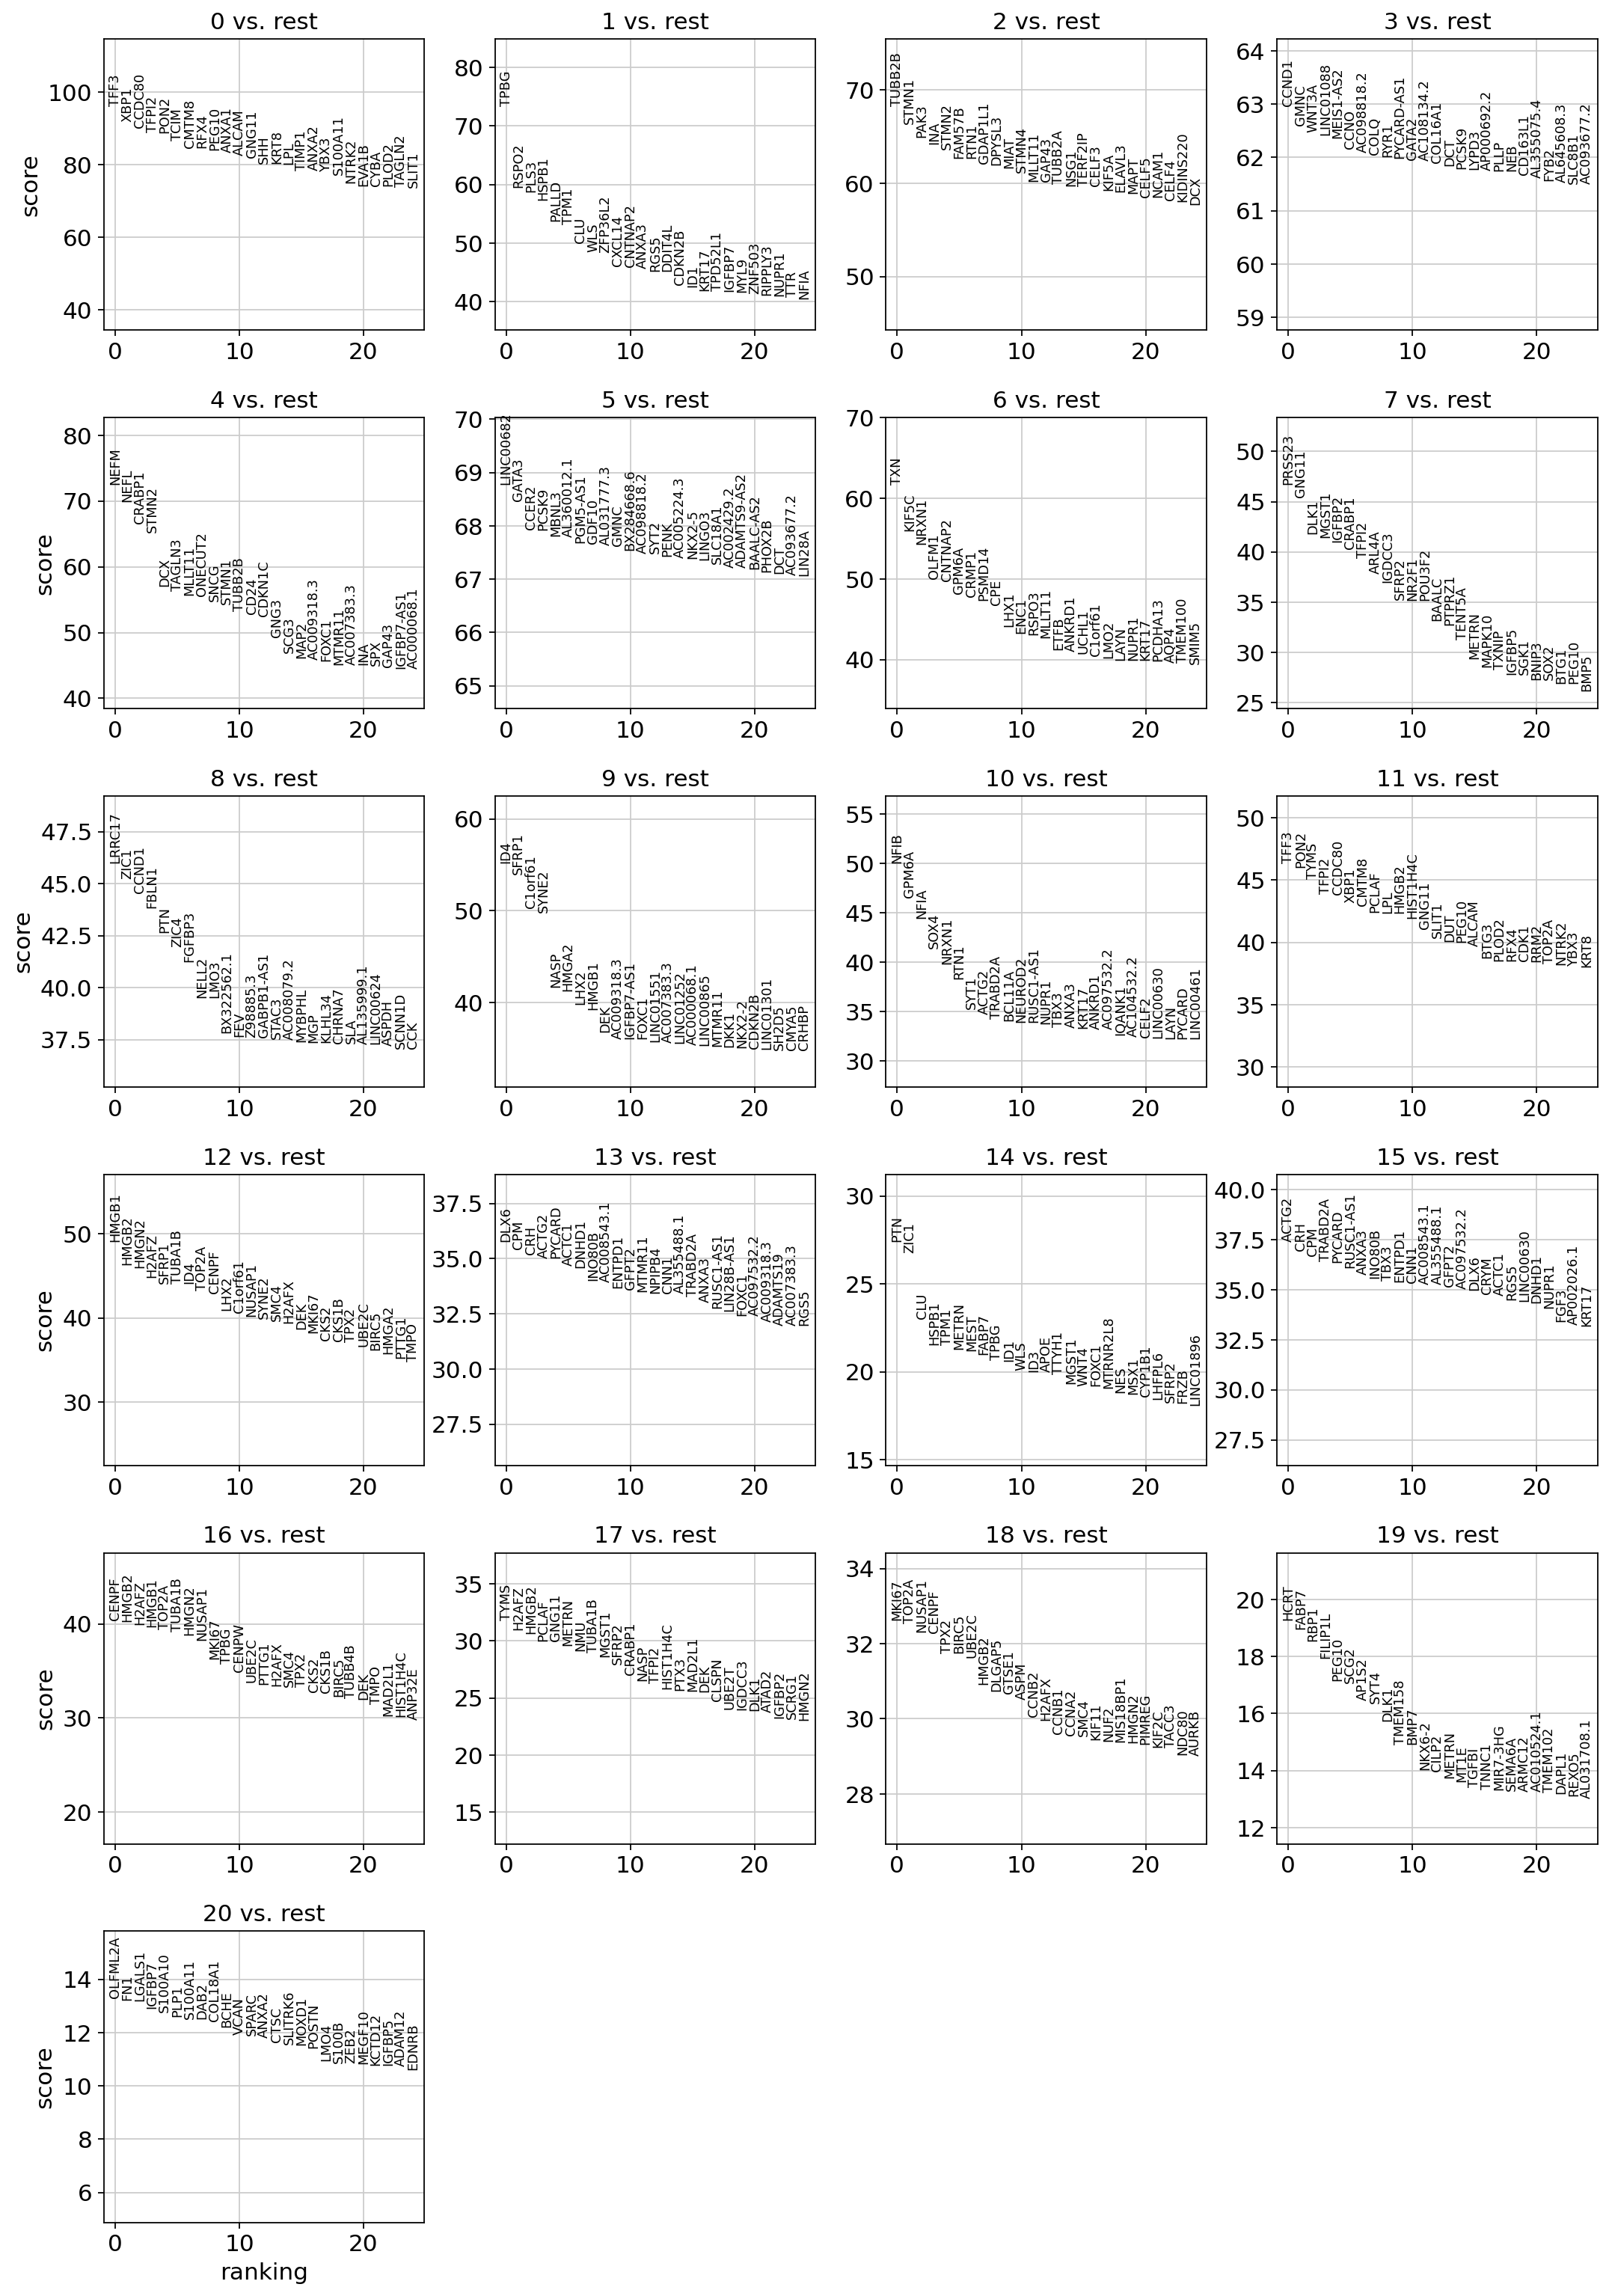

In [40]:
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [0]:
out_dir = 'integrated_data/florian3set_clustered.h5d'
adata.write(out_dir)

# Annotation

In [0]:
marker_df = pd.read_csv("integrated_data/PanglaoDB_markers_27_Mar_2020_delete1.csv")

In [0]:
marker_df.head()

,species,official gene symbol,cell type,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,Mm Hs,CTRB1,Acinar cells,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,Mm Hs,KLK1,Acinar cells,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,Mm Hs,RBPJL,Acinar cells,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,Mm Hs,PTF1A,Acinar cells,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
4,Mm,TRY4,Acinar cells,0.007,trypsin 4,protein coding gene,1.0,Endoderm,Pancreas,NaN,NaN,NaN,NaN


In [0]:
# Description: Interneurons create neural circuits, enabling communication between sensory or motor neurons and the central nervous system.
# Description: Neurons of the Trigeminal ganglion (relaying sensation in the face and motor functions).
# Description: A neuroblast is a postmitotic cell that does not divide further and which will develop into a neuron after a migration phase. Neuroblasts differentiate from neural stem cells and are committed to become neurons.

cell_types = ['Dopaminergic neurons', 'GABAergic neurons', 'Glutaminergic neurons', 'Glycinergic neurons', 'Immature neurons', 'Interneurons', 'Motor neurons', 'Neural stem/precursor cells', 'Neurons', 'Noradrenergic neurons', 'Neuroblasts', 'Neuroendocrine cells', 'Adrenergic neurons', 'Cholinergic neurons', 'Noradrenergic neurons', 'Purkinje neurons', 'Serotonergic neurons', 'Trigeminal neurons']

In [0]:
len(cell_types)

18

In [0]:
# generate the marker lists
marker_dic = {}
for type in cell_types:
  marker_dic[type] = marker_df[marker_df["cell type"] == type]["official gene symbol"].to_list()

In [44]:
cell_annotation = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups')
cell_annotation

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Dopaminergic neurons,1.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
GABAergic neurons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Glutaminergic neurons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Glycinergic neurons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Immature neurons,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Interneurons,1.0,2.0,2.0,3.0,4.0,0.0,3.0,0.0,7.0,3.0,3.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0
Motor neurons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Neural stem/precursor cells,2.0,0.0,1.0,1.0,3.0,1.0,2.0,2.0,0.0,4.0,2.0,1.0,5.0,1.0,4.0,1.0,2.0,1.0,1.0,3.0,4.0
Neurons,2.0,2.0,5.0,0.0,3.0,0.0,3.0,1.0,5.0,1.0,0.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,3.0,1.0,2.0
Noradrenergic neurons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


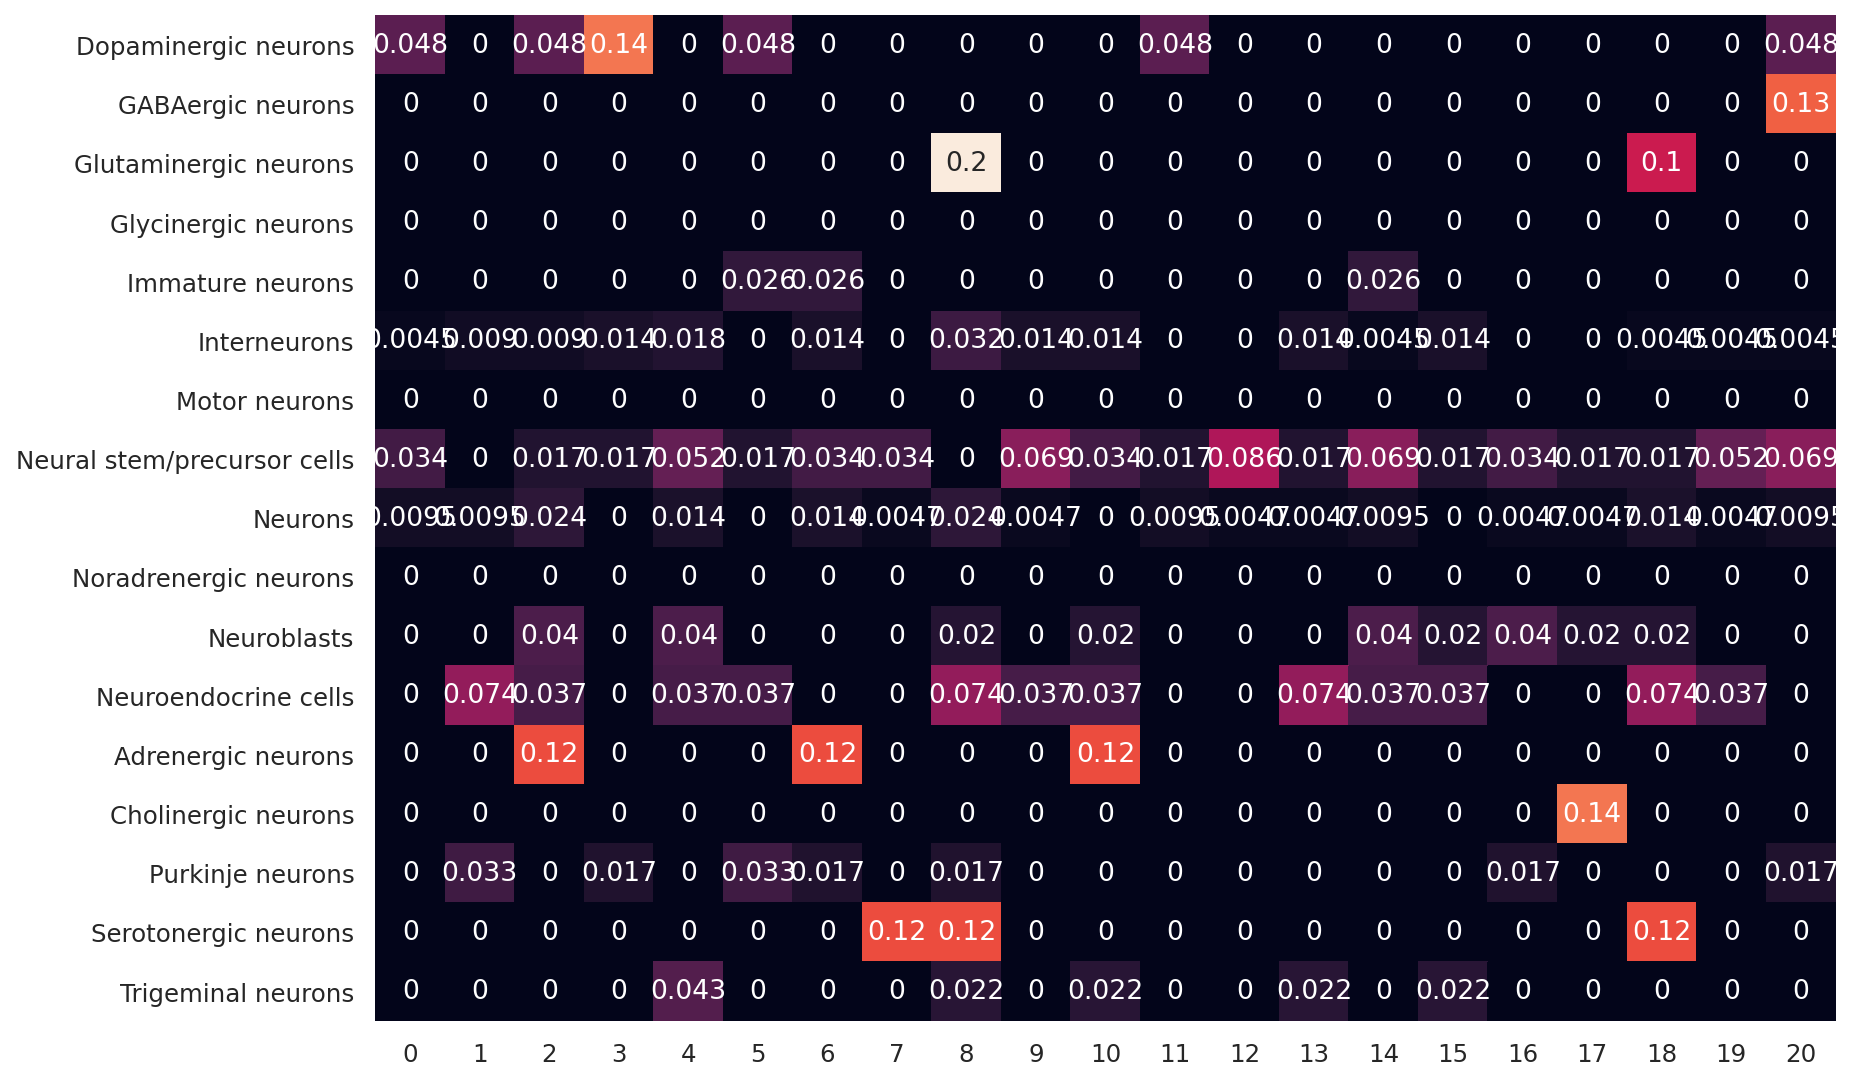

In [45]:
import seaborn as sb
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups', normalize='reference')
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.heatmap(cell_annotation_norm, cbar=False, annot=True)

simply at the fraction of known marker genes that are found in the cluster marker gene sets from the rank_genes_groups() function.

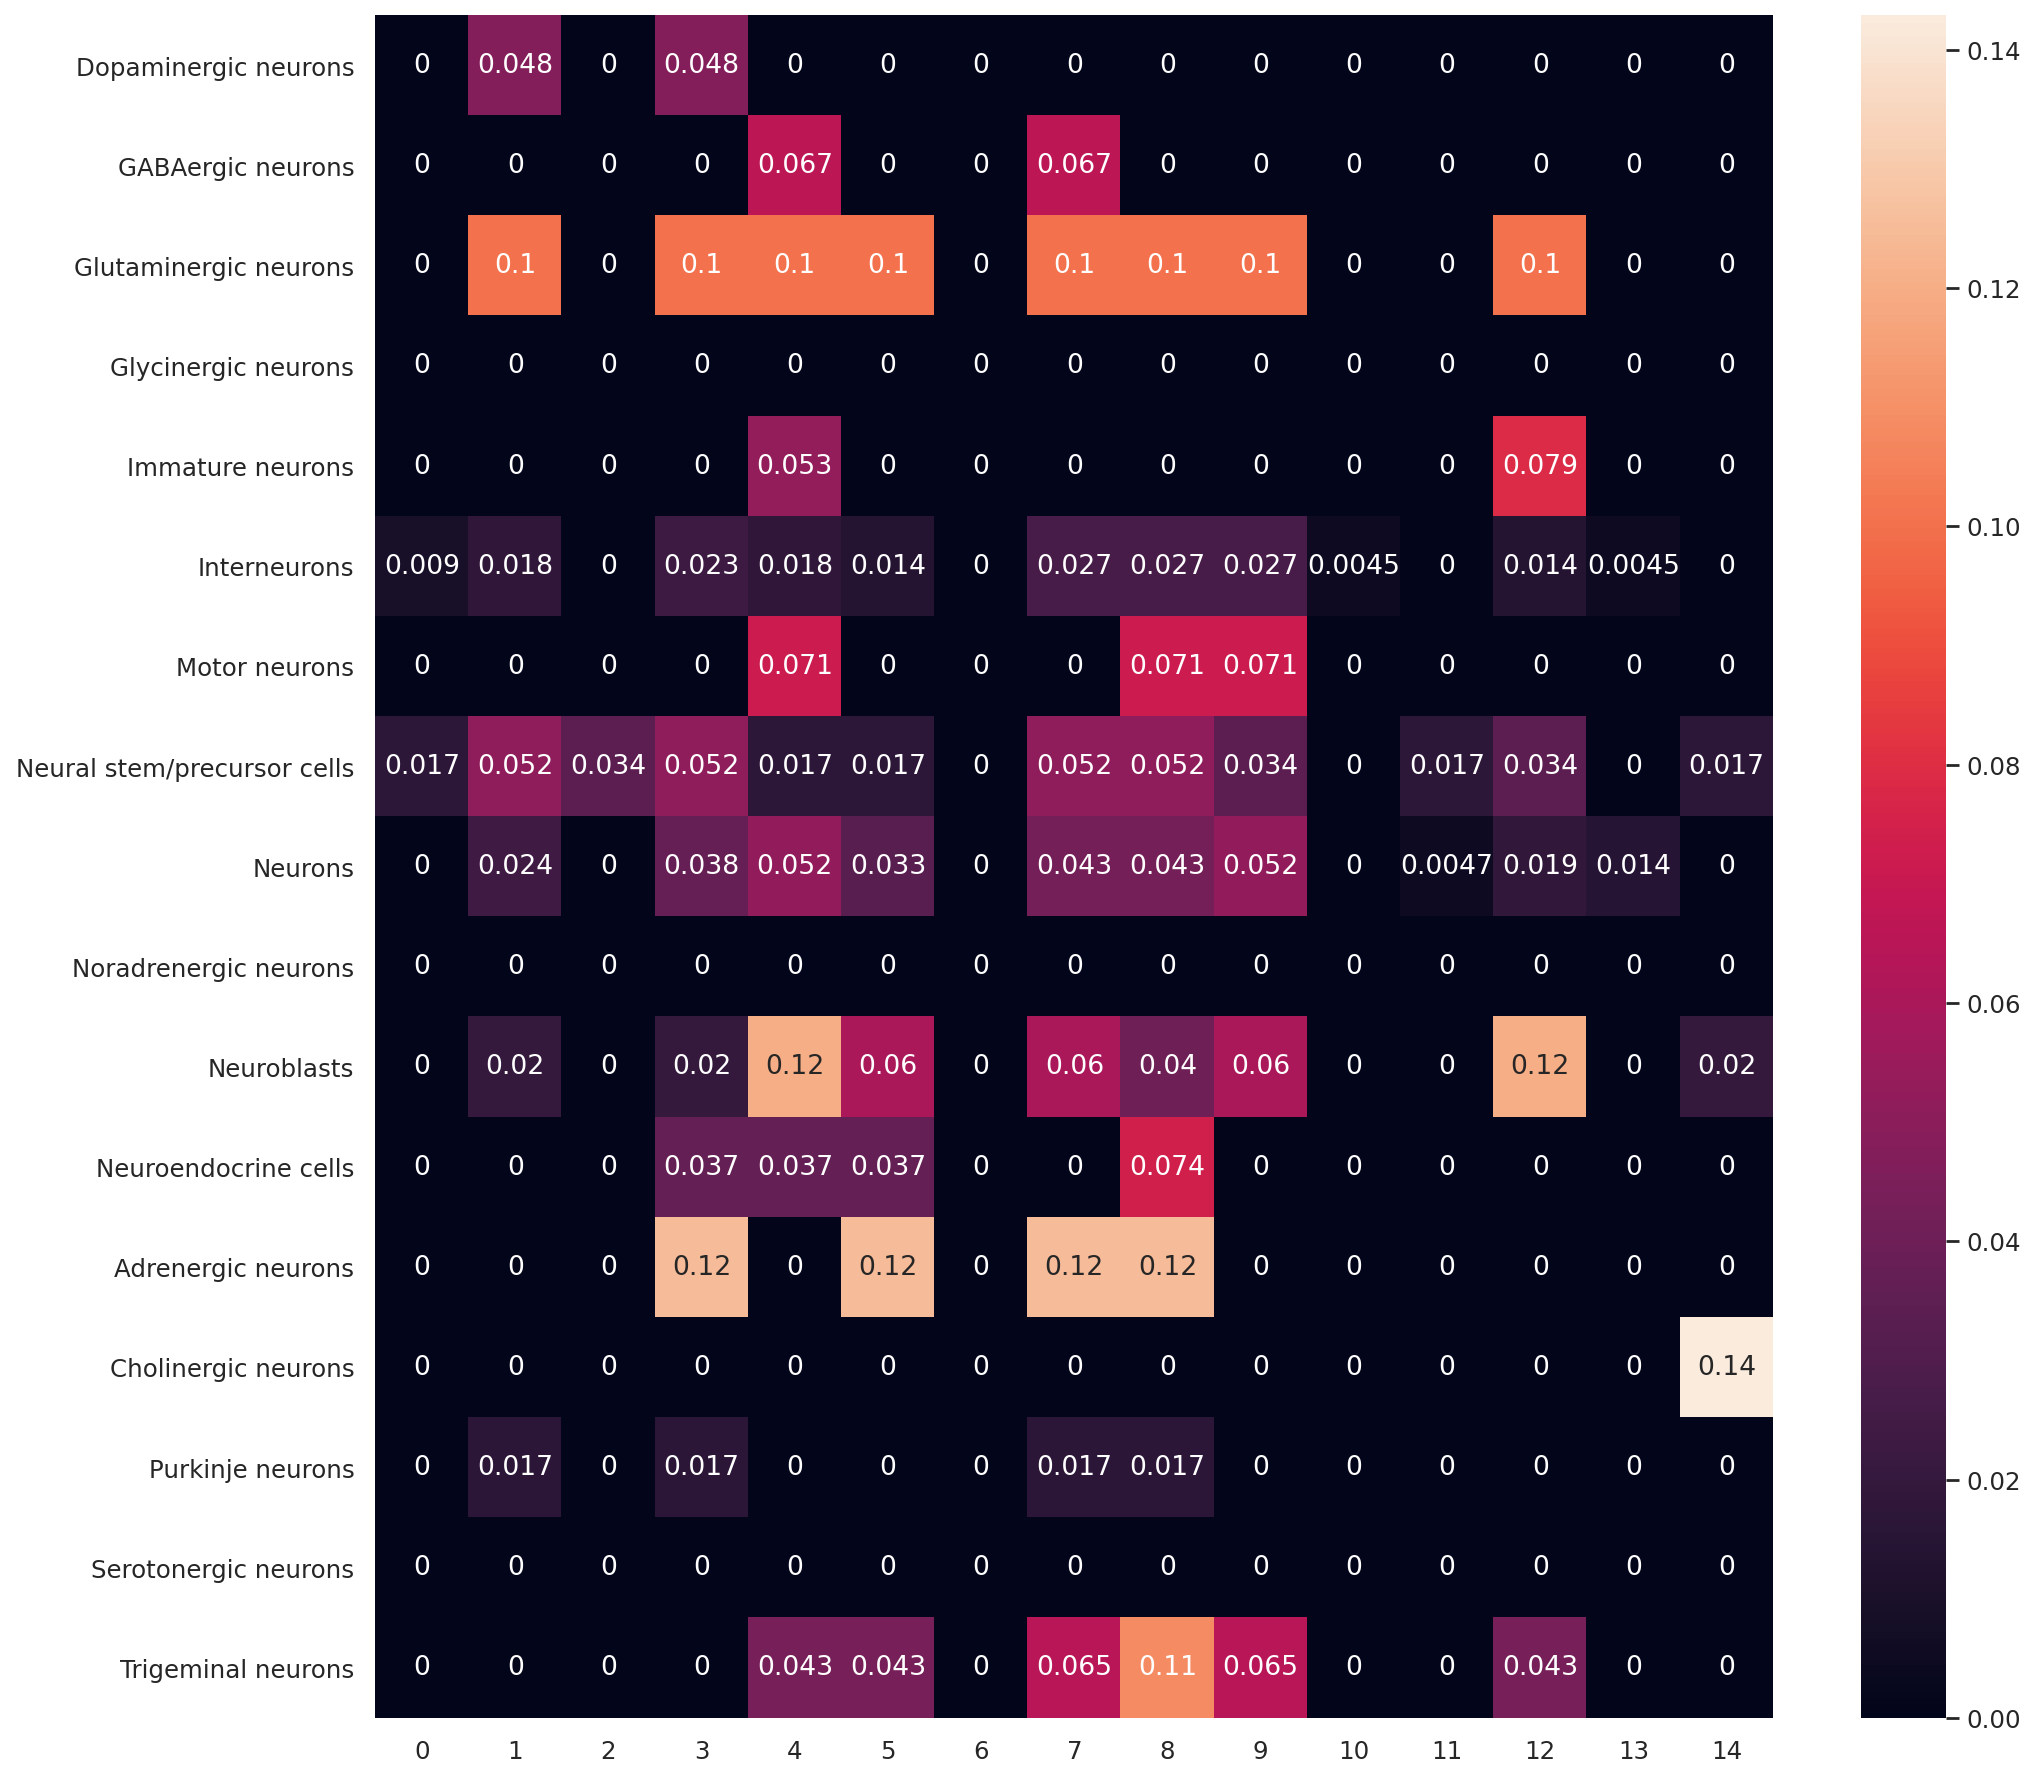

In [0]:
#We can also visualize the marker gene overlap as a fraction of the total marker genes,
# and then plot this as a heatmap for simpler cell identity annotation.

sb.set(rc={'figure.figsize':(14, 14)})
sb.heatmap(cell_annotation_norm, annot=True)

In [0]:
adata

AnnData object with n_obs × n_vars = 18780 × 2623 
    obs: 'batch', 'donor_id', 'donor_label', 'leiden', 'leiden_0.4', 'leiden_0.6', 'n_counts', 'n_genes', 'percent_mito'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells-iPSC', 'highly_variable-iPSC', 'means-iPSC', 'dispersions-iPSC', 'dispersions_norm-iPSC', 'n_cells-combined2_hNGN2', 'highly_variable-combined2_hNGN2', 'means-combined2_hNGN2', 'dispersions-combined2_hNGN2', 'dispersions_norm-combined2_hNGN2', 'n_cells-combined2_hNIL', 'highly_variable-combined2_hNIL', 'means-combined2_hNIL', 'dispersions-combined2_hNIL', 'dispersions_norm-combined2_hNIL', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'batch_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'